# **11.1 Image stitching**

Image stitching (Mosaicing) is considered as an active research area in computer vision and computer graphics. Image stitching is concerned with combining two or more images of the same scene into one high resolution image which is called panoramic image. The basic geometry of the problem is well understood, and consists of estimating a $3\times3$ camera matrix or homography for each image.

In this practise, we will explain how a complex image stitching application works and you will develop a basic one. You will need to understand how feature matching (chapter 04) and homographies (chapter 08) work in order to complete this notebook.

<img src="https://raw.githubusercontent.com/famoreno/cv_jn_images/master/ch11/insert/stitching5_res.jpg" width="800" />

In [1]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['figure.figsize'] = (12.0, 12.0)

images_path = '/gdrive/My Drive/Colab Notebooks/Chapter 11. Real-world applications/images/'

## **OpenCV Stitcher class**

OpenCV defines the class [Stitcher](https://docs.opencv.org/4.2.0/d2/d8d/classcv_1_1Stitcher.html), which implements a complex image stitching tool. The next code shows an example of how two or more images can be stitched using that class:

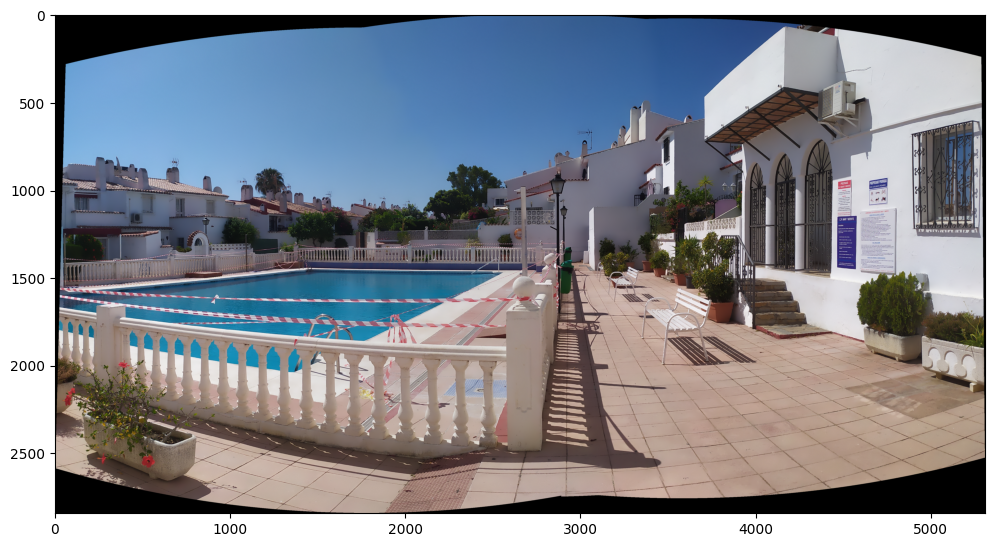

In [3]:
# Example code
images = []
images.append(cv2.imread(images_path + "stitching2_1.jpg"))
images.append(cv2.imread(images_path + "stitching2_2.jpg"))
images.append(cv2.imread(images_path + "stitching2_3.jpg"))

stitcher = cv2.Stitcher.create(mode=0)
_, panorama = stitcher.stitch(images)

cv2.imwrite(images_path + "stitching2_res.jpg",panorama)
panorama = cv2.cvtColor(panorama,cv2.COLOR_BGR2RGB)
plt.imshow(panorama);

But... **how does it works?**

Basically, for achieving image stitching, we have 2 main steps:

- **Finding and matching features.** The first step in panorama stitching is to extract and match features. For this we can use Harris + NCC, ORB, ...

- **Image Matching.**  In this step, we can use [RANSAC, LMEDS, ...](https://docs.opencv.org/4.2.0/d9/d0c/group__calib3d.html#ga4abc2ece9fab9398f2e560d53c8c9780) methods to estimate the homographies of the best matched pairs, with these homographies, images can be aligned.This is often called **local registration**.

However, we can enhance the resulting images using some extra methods that complex tools usually implement. We can see the whole stitching module pipeline that is implemented in OpenCV in the following figure:

<img src="https://raw.githubusercontent.com/famoreno/cv_jn_images/master/ch11/insert/pipeline.png" width="800" />

Using the Stitcher class, it is possible to configure/remove some steps, i.e. adjust the stitching pipeline according to the particular needs.

**Your task in this notebook** will be to stitch example images `stitching_1.jpg` and `stitching_2.jpg`.

You can see how OpenCV achieves it using the following code:

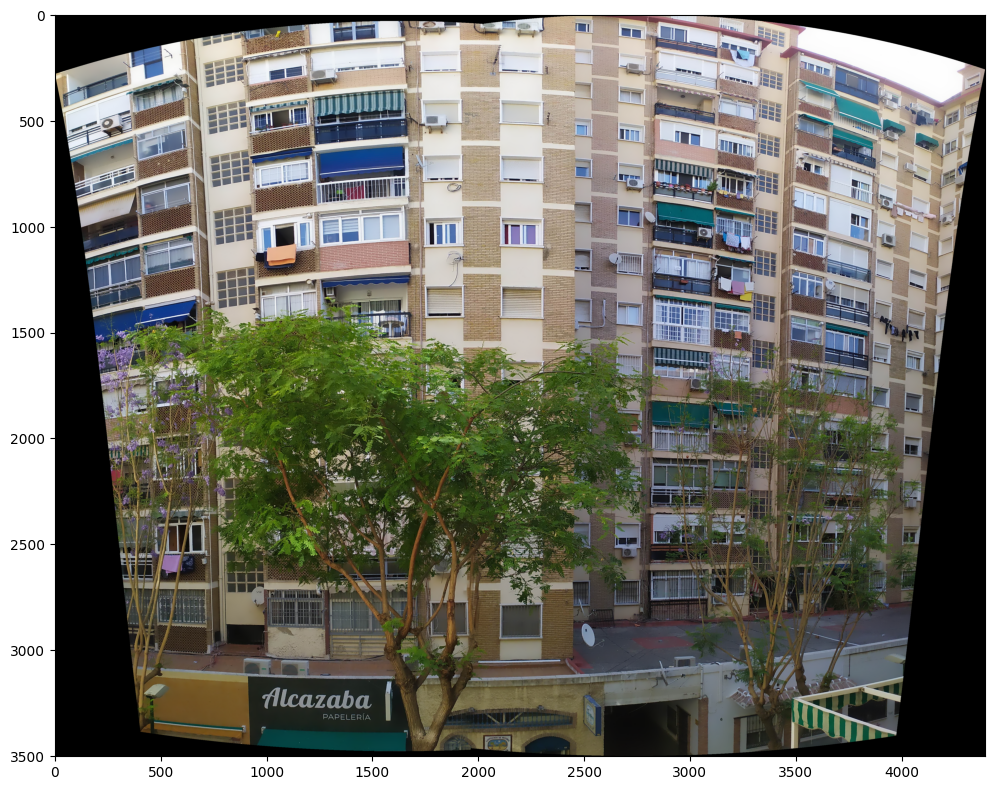

In [4]:
# Example code
images = []
images.append(cv2.imread(images_path + "stitching_1.jpg"))
images.append(cv2.imread(images_path + "stitching_2.jpg"))


stitcher = cv2.Stitcher.create(mode=0)
_, panorama = stitcher.stitch(images)

cv2.imwrite(images_path + "stitching_res.jpg",panorama)
panorama = cv2.cvtColor(panorama,cv2.COLOR_BGR2RGB)
plt.imshow(panorama);

### **<font color="green">ASSIGNMENT 1</font>**
**Developing our own stitcher**

As we said above, we have to stitch images `stitching_1.jpg` and `stitching_2.jpg` with our own code, avoiding the class `cv2.Stitcher` in order to learn how it can be done from scratch.

In a nutshell, what you should do is **getting matching points in both images** and then **finding the homography that transforms the points in the second image over their matchings in the first one**, or the other way around (you may use `cv2.RANSAC` for finding the homography).

In [5]:
# ASSIGNMENT 1
# Write your code here!

# Read images in color
# Convert them to grayscale
# Detect and match keypoints
# Find homography
# Plot the stitched (color) images: [image1 image2_warped]

#### **<font color=red><b>Expected output</b></font>**

The resulting image should look like this (as you can see, only the second image has been transformed):

<img src="https://raw.githubusercontent.com/famoreno/cv_jn_images/master/ch11/insert/stitching_manual.png" width="600" />